# Analysis of COVID-19 pandemics

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [223]:
confirmed_ds = pd.read_csv('data/time_series_19-covid-Confirmed.csv', sep=',')
deaths_ds = pd.read_csv('data/time_series_19-covid-Deaths.csv', sep=',')
#recovered_ds = pd.read_csv('data/time_series_19-covid-Recovered.csv', sep=',')

confirmed_desc = confirmed_ds.filter(['Province/State', 'Country/Region'])
deaths_desc = deaths_ds.filter(['Province/State', 'Country/Region'])
#recovered_desc = recovered_ds.filter(['Province/State', 'Country/Region'])

confirmed_data = confirmed_ds.drop(['Province/State','Country/Region','Lat','Long'], axis=1)
deaths_data =deaths_ds.drop(['Province/State','Country/Region','Lat','Long'], axis=1)
#recovered_data = recovered_ds.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [224]:
confirmed_shape = confirmed_ds.shape
deaths_shape = deaths_ds.shape
#recovered_shape = recovered_ds.shape

In [225]:
confirmed_summary = confirmed_ds.describe
deaths_summary = deaths_ds.describe
#recovered_summary = recovered_ds.describe

In [226]:
print(confirmed_shape)
print(deaths_shape)
#print(recovered_shape)

(482, 64)
(482, 64)


In [227]:
print(confirmed_summary)

<bound method NDFrame.describe of             Province/State        Country/Region      Lat      Long  1/22/20  \
0                      NaN              Thailand  15.0000  101.0000        2   
1                      NaN                 Japan  36.0000  138.0000        2   
2                      NaN             Singapore   1.2833  103.8333        0   
3                      NaN                 Nepal  28.1667   84.2500        0   
4                      NaN              Malaysia   2.5000  112.5000        0   
5         British Columbia                Canada  49.2827 -123.1207        0   
6          New South Wales             Australia -33.8688  151.2093        0   
7                 Victoria             Australia -37.8136  144.9631        0   
8               Queensland             Australia -28.0167  153.4000        0   
9                      NaN              Cambodia  11.5500  104.9167        0   
10                     NaN             Sri Lanka   7.0000   81.0000        0   
11    

In [228]:
print(deaths_summary)

<bound method NDFrame.describe of             Province/State        Country/Region      Lat      Long  1/22/20  \
0                      NaN              Thailand  15.0000  101.0000        0   
1                      NaN                 Japan  36.0000  138.0000        0   
2                      NaN             Singapore   1.2833  103.8333        0   
3                      NaN                 Nepal  28.1667   84.2500        0   
4                      NaN              Malaysia   2.5000  112.5000        0   
5         British Columbia                Canada  49.2827 -123.1207        0   
6          New South Wales             Australia -33.8688  151.2093        0   
7                 Victoria             Australia -37.8136  144.9631        0   
8               Queensland             Australia -28.0167  153.4000        0   
9                      NaN              Cambodia  11.5500  104.9167        0   
10                     NaN             Sri Lanka   7.0000   81.0000        0   
11    

In [229]:
#print(recovered_summary)

## Select some countries and clean data

In [230]:
def getCountryData(country_name, confirmed_desc, deaths_desc):  
    country_confirmed = confirmed_data.iloc[np.where(confirmed_desc['Country/Region'] == country_name)]
    country_deaths = deaths_data.iloc[np.where(deaths_desc['Country/Region'] == country_name)]

    return country_confirmed, country_deaths

In [403]:
def getSlicedArraysFromDayOne(confirmed, deaths):
    total_size = len(confirmed)
    confirmed_clean = np.trim_zeros(confirmed)
    clean_size = len(confirmed_clean)    
    starting_slice = total_size-clean_size+1
    deaths_clean = deaths[starting_slice-1:]
    
    days = np.arange(1, clean_size+1, 1)

    return confirmed_clean, deaths_clean, days

In [404]:
brazil_confirmed, brazil_deaths = getCountryData('Brazil', confirmed_ds, deaths_ds)

china_confirmed, china_deaths = getCountryData('China', confirmed_ds, deaths_ds)
china_confirmed_all = china_confirmed.sum()

italy_confirmed, italy_deaths = getCountryData('Italy', confirmed_ds, deaths_ds)
spain_confirmed, spain_deaths = getCountryData('Spain', confirmed_ds, deaths_ds)

us_confirmed, us_deaths = getCountryData('US', confirmed_ds, deaths_ds)
us_confirmed_all = us_confirmed.sum()

In [287]:
#us_indexes = us_confirmed.shape()
#tem = confirmed_data[brazil_confirmed]
#transposed = np.transpose(us_confirmed)
#print(item)
#print(china_confirmed_all['3/16/20'])
#print(brazil_confirmed.iloc[0]['3/16/20'])
#print(confirmed_ds['Country/Region'])

print(us_confirmed_all['3/21/20'])
print(us_confirmed_all[59])

#colname = brazil_confirmed.columns[59]
colname = us_confirmed.columns[59]

print(colname)

25489
25489
3/21/20


## Casos confirmados

In [405]:
br_confirmed_clean, br_deaths_clean, br_days = getSlicedArraysFromDayOne(brazil_confirmed.iloc[0], brazil_deaths.iloc[0])
it_confirmed_clean, it_deaths_clean, it_days = getSlicedArraysFromDayOne(italy_confirmed.iloc[0], italy_deaths.iloc[0])
es_confirmed_clean, es_deaths_clean, es_days = getSlicedArraysFromDayOne(spain_confirmed.iloc[0], spain_deaths.iloc[0])

In [406]:
print(br_confirmed_clean)
print(br_deaths_clean)

2/26/20       1
2/27/20       1
2/28/20       1
2/29/20       2
3/1/20        2
3/2/20        2
3/3/20        2
3/4/20        4
3/5/20        4
3/6/20       13
3/7/20       13
3/8/20       20
3/9/20       25
3/10/20      31
3/11/20      38
3/12/20      52
3/13/20     151
3/14/20     151
3/15/20     162
3/16/20     200
3/17/20     321
3/18/20     372
3/19/20     621
3/20/20     793
3/21/20    1021
Name: 35, dtype: int64
2/26/20     0
2/27/20     0
2/28/20     0
2/29/20     0
3/1/20      0
3/2/20      0
3/3/20      0
3/4/20      0
3/5/20      0
3/6/20      0
3/7/20      0
3/8/20      0
3/9/20      0
3/10/20     0
3/11/20     0
3/12/20     0
3/13/20     0
3/14/20     0
3/15/20     0
3/16/20     0
3/17/20     1
3/18/20     3
3/19/20     6
3/20/20    11
3/21/20    15
Name: 35, dtype: int64


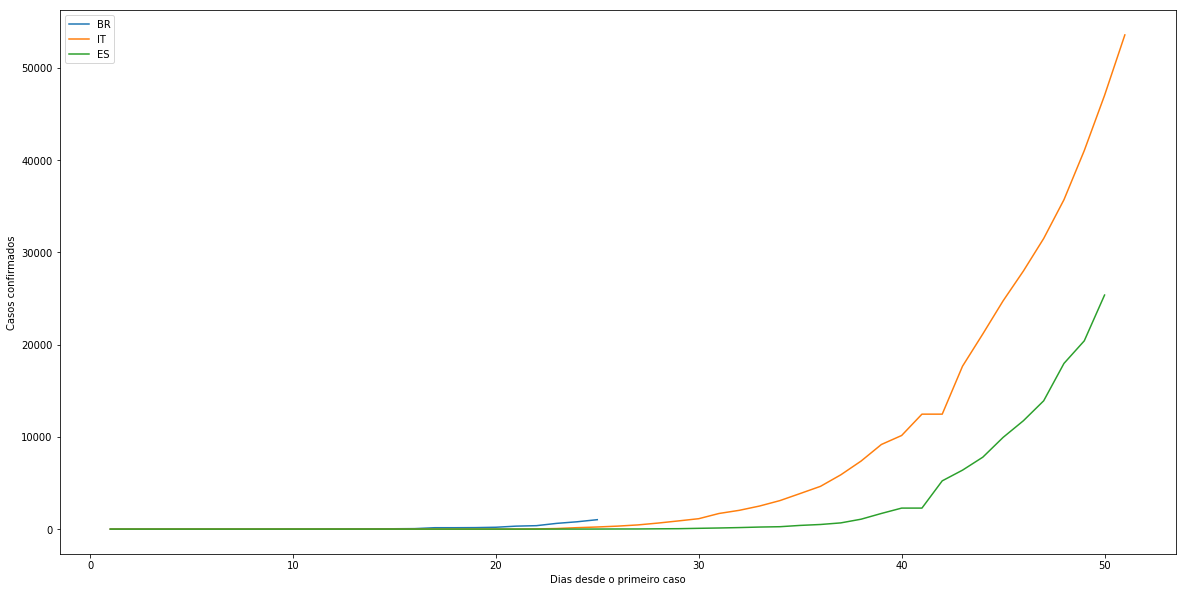

In [407]:
plt.figure(figsize=(20,10))
plt.plot(br_days, br_confirmed_clean, label='BR')
plt.plot(it_days, it_confirmed_clean, label='IT')
plt.plot(es_days, es_confirmed_clean, label='ES')

plt.xlabel("Dias desde o primeiro caso")
plt.ylabel("Casos confirmados")

plt.legend(loc="upper left")
#fig.savefig("test.png")
plt.show()

## Mortes

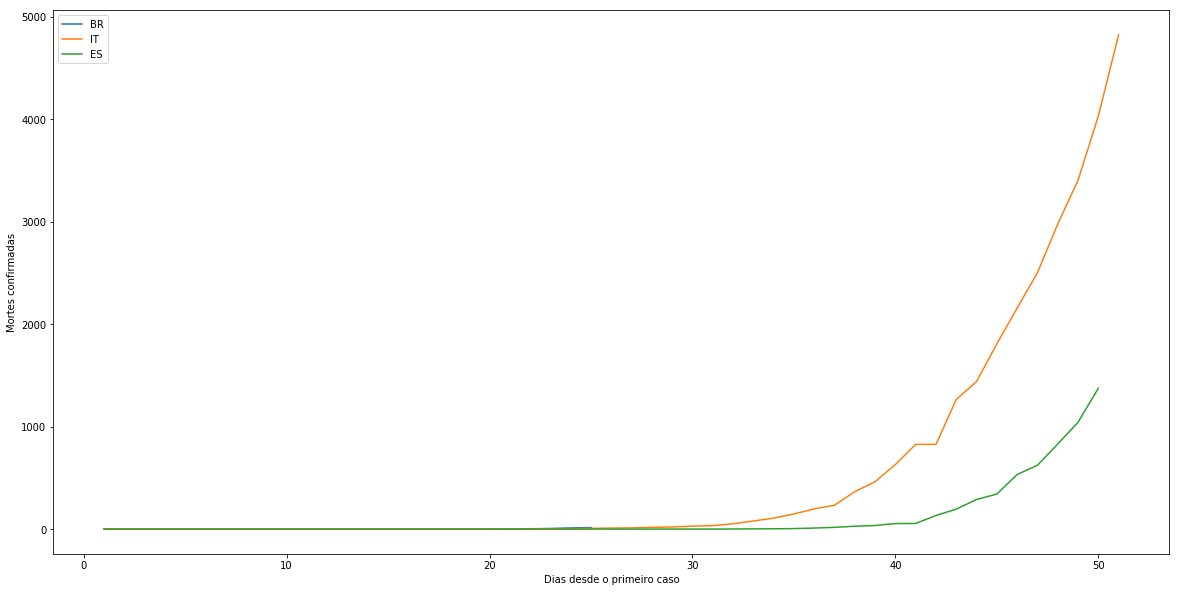

In [408]:
plt.figure(figsize=(20,10))
plt.plot(br_days, br_deaths_clean, label='BR')
plt.plot(it_days, it_deaths_clean, label='IT')
plt.plot(es_days, es_deaths_clean, label='ES')

plt.xlabel("Dias desde o primeiro caso")
plt.ylabel("Mortes confirmadas")

plt.legend(loc="upper left")
#fig.savefig("test.png")
plt.show()